<a href="https://colab.research.google.com/github/Sparadrap1101/CryptoFinance/blob/main/1%2B2Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Author: Alexis Cerio
#
# Subject: We want to simulate a 1+2 Strategy against an honest mining strategy in order to determine which one is the most profitable.
# 
#
# Strategy Process: In this strategy, as soon as the attacker mines a block on the main chain before the honest miners, he will wait two more blocks
# before potentially making his blocks public.
# If in the next two blocks the attacker mines at least one more, he will then publish them and overwrite the main chain with the honest miners because
# his will be longer. In the opposite case, he will simply abandon his blocks and start mining again from the main chain.
#
# We aim to simulate this mining strategy and check from how much hashrate this strategy becomes profitable.

import random

# We define the variables necessary for the simulation.
totalHashrate = 100
coinbaseRevenu = 6.25
allAttackerHashrate = list(range(0, 101))
finalCoefficient = []
finalHonestCoefficient = []
thresholdBestStrat = 0
locker = 0

nbreCycle = int(input("Number of cycles? (e.g. 10.000) > "))

Number of cycles? (e.g. 10.000) > 10000


In [35]:
print("Waiting for compute...")

# We start simulation here.
# First we do a for loop to simulate with all different attacker hashrate % possible.
for attackerHashrate in allAttackerHashrate:
  # We create and reset the block height, the honest miner revenue and the attacker revenue values for each simulation.
  honestRevenu = 0
  finalRevenu = 0
  blockHeight = 0
  
  # We launch the simulation and calculate the block height and yield of the strategy over X attack cycles defined earlier.
  for i in range(nbreCycle):
    blocSequence = []

    # We create our sequence of 3 blocks, and depending on the results we will see the yields of each strategy.
    for j in range(3):
      blockMined = random.randrange(0, totalHashrate) # A new block is mined.
      
      if (blockMined <= attackerHashrate): # If the attacker mines the block we add 1 to our block sequence.
        blocSequence.append(1)
      else: # If the attacker don't mines the block we add 0 to our block sequence.
        blocSequence.append(0)

    
    # Once the block sequence is created we calculate the yield of each strategy.

    # If the attacker did not mine the first block, then he immediately start mining again from the main chain. 
    # So we increment the block height and only increase the earnings of honest mining.
    if blocSequence[0] == 0:
      blockHeight += 1
      honestRevenu += (attackerHashrate / totalHashrate) * coinbaseRevenu

    # If the attacker only mined the first block, then he abandon his block after the sequence and start mining again from the main chain. 
    # So we increment the block height and only increase the earnings of honest mining.
    elif blocSequence == [1, 0, 0]:
      blockHeight += 2
      honestRevenu += ((attackerHashrate / totalHashrate) * coinbaseRevenu) * 2

    # If the attacker mined the first block and the last block of the sequence, then he make his blocks public and collect the generated earnings. 
    # So we increment the block height, the attacker's earnings, and the earnings of honest mining.
    elif blocSequence == [1, 0, 1]:
      blockHeight += 2
      honestRevenu += ((attackerHashrate / totalHashrate) * coinbaseRevenu) * 2
      finalRevenu += coinbaseRevenu * 2

    # If the attacker mined the first block and the second block of the sequence, then he make his blocks public and collect the generated earnings. 
    # So we increment the block height, the attacker's earnings, and the earnings of honest mining.
    elif blocSequence == [1, 1, 0]:
      blockHeight += 2
      honestRevenu += ((attackerHashrate / totalHashrate) * coinbaseRevenu) * 2
      finalRevenu += coinbaseRevenu * 2

    # If the attacker mined all the blocks in the sequence, then he make his blocks public and collect the generated earnings. 
    # So we increment the block height, the attacker's earnings, and the earnings of honest mining.
    elif blocSequence == [1, 1, 1]:
      blockHeight += 3
      honestRevenu += ((attackerHashrate / totalHashrate) * coinbaseRevenu) * 3
      finalRevenu += coinbaseRevenu * 3

  # Once all cycles are completed for a given hashrate value, we save the yield coefficient of the attacker and the honest miner in order to verify
  # and display the most profitable strategy to implement based on the hashrate.
  finalCoefficient.append(finalRevenu / blockHeight)
  finalHonestCoefficient.append(honestRevenu / blockHeight)

  # We then determine the attacker's hashrate % threshold at which the 1+2 Strategy is the most profitable one.

  # For that, we add a locker to stop the threshold value when the best yield has significantly shifted to the attacker's side. This lock prevents a  
  # potential modification of the threshold value in case the strategy becomes more profitable again for the honest miner with more hashrate.
  locker = locker + 1 if max(finalRevenu, honestRevenu) == finalRevenu else locker
  thresholdBestStrat = attackerHashrate if (max(finalRevenu, honestRevenu) == honestRevenu and locker < 15) else thresholdBestStrat

print("Finalized!")

Waiting for compute...
Finalized!


We can see that the threshold from which the 1+2 Strategy is the best one is when the attacker have more than about 38% of the total hashrate.


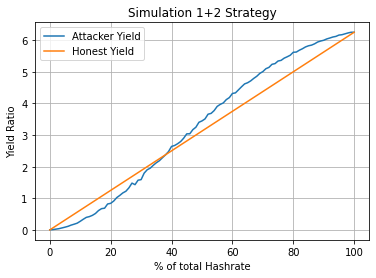

In [36]:
import matplotlib.pyplot as plt
import numpy as np

print("We can see that the threshold from which the 1+2 Strategy is the best one is when the attacker have more than about " + str(thresholdBestStrat) + "% of the total hashrate.")

# We simply end by displaying the yield ratio curves of our simulation in order to see which strategie is the best based on the hashrate.
plt.plot(allAttackerHashrate, finalCoefficient, label="Attacker Yield")
plt.plot(allAttackerHashrate, finalHonestCoefficient, label="Honest Yield")
plt.legend(loc='upper left')
plt.xlabel('% of total Hashrate')
plt.ylabel('Yield Ratio')
plt.title("Simulation 1+2 Strategy")
plt.grid()
plt.show()